In [747]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [748]:
df = pd.read_csv("/content/car_price_prediction.csv")

df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [749]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [750]:
df.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [751]:
desc = ['Price','Prod. year', 'Cylinders', 'Airbags']
df[desc].describe()

,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,1.855593e+04,2010.912824,4.582991,6.582627
std,1.905813e+05,5.668673,1.199933,4.320168
min,1.000000e+00,1939.000000,1.000000,0.000000
25%,5.331000e+03,2009.000000,4.000000,4.000000
50%,1.317200e+04,2012.000000,4.000000,6.000000
75%,2.207500e+04,2015.000000,4.000000,12.000000
max,2.630750e+07,2020.000000,16.000000,16.000000


In [752]:
for col in df.columns:
    print(col)
    print(df[f'{col}'].unique())
    print('*'*75)

ID
[45654403 44731507 45774419 ... 45804997 45793526 45813273]
***************************************************************************
Price
[13328 16621  8467 ... 56814 63886 22075]
***************************************************************************
Levy
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798'

In [753]:
df[df['Levy'] == '-']

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
11,45814819,8781,-,FORD,Transit,1999,Microbus,No,CNG,4,0 km,8.0,Manual,Rear,02-Mar,Left wheel,Blue,0
12,45815568,3000,-,OPEL,Vectra,1997,Goods wagon,No,CNG,1.6,350000 km,4.0,Manual,Front,04-May,Left wheel,White,4
23,45814106,7840,-,FORD,Transit,2001,Microbus,No,Diesel,2.0 Turbo,230000 km,4.0,Manual,Front,02-Mar,Left wheel,White,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19223,44571028,8781,-,DODGE,Caliber,2008,Hatchback,No,Petrol,2.4,0 km,4.0,Automatic,Front,04-May,Left wheel,Blue,4
19224,45768089,19130,-,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
19226,45796788,7840,-,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3,220000 km,6.0,Tiptronic,Rear,04-May,Right-hand drive,White,0
19229,39977395,50,-,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000 km,4.0,Automatic,Front,04-May,Left wheel,Silver,6


In [754]:
# Replacing '-' with null
df['Levy'].replace({'-':np.nan}, inplace = True)
# Converting Levy type to float
df['Levy'] = df['Levy'].astype('float64')

In [755]:
df['Levy'].fillna(value=df['Levy'].median(), inplace=True)

In [756]:
df.nunique()

ID                  18924
Price                2315
Levy                  558
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [757]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [758]:
# Replacement: Yes >> True , No >> False
df['Leather interior'].replace({'Yes': True, 'No':False}, inplace=True)

In [759]:
# Making sure that we don miss anything so making everything lower first
df['Engine volume'] = df['Engine volume'].str.lower()


In [760]:
#rows which has turbo in them and assigning the results to new column Turbo. 
df['Turbo'] = df['Engine volume'].str.contains('turbo')

In [761]:

# Slicing engine volumes and converting type to float
df['Engine volume'] = df['Engine volume'].str.slice(0,3)
df['Engine volume'] = df['Engine volume'].astype('float64')

In [762]:
df['Mileage'] = df['Mileage'].str.strip('km')
df['Mileage'] = df['Mileage'].astype('int64')

In [763]:
df['Doors'].replace({'04-May':4, '02-Mar':2, '>5':5}, inplace=True)

In [764]:
cars = df.drop('ID', axis=1)

In [765]:
cars.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,False
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False
2,8467,781.0,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,False
3,3607,862.0,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,False
4,11726,446.0,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,False


In [766]:
def replace_outliers_median(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    x[x < lower_bound] = np.median(x)
    x[x > upper_bound] = np.median(x)
    return x

# Define a function to replace outliers with the mode for categorical variables
def replace_outliers_mode(x):
    mode = x.mode()[0]
    x[x != mode] = mode
    return x


In [767]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  float64
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  bool   
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  float64
 9   Mileage           19237 non-null  int64  
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  int64  
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [768]:
cars.nunique()

Price               2315
Levy                 558
Manufacturer          65
Model               1590
Prod. year            54
Category              11
Leather interior       2
Fuel type              7
Engine volume         65
Mileage             7687
Cylinders             13
Gear box type          4
Drive wheels           3
Doors                  3
Wheel                  2
Color                 16
Airbags               17
Turbo                  2
dtype: int64

<AxesSubplot:>

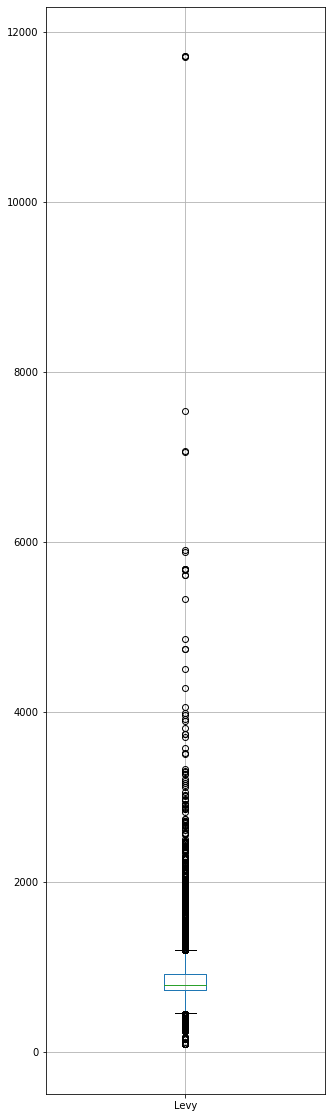

In [769]:

df = pd.DataFrame(cars, columns = [ 'Levy'])  

plt.figure(figsize = (5, 20)) 
  
df.boxplot()

In [770]:
# Apply the functions to the data
cars[['Price', 'Levy', 'Mileage']] = cars[['Price', 'Levy', 'Mileage']].apply(replace_outliers_median)

<AxesSubplot:>

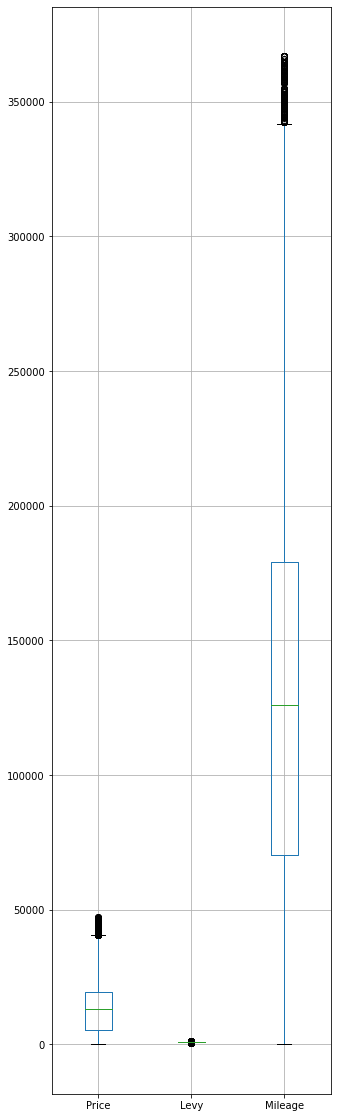

In [771]:

df = pd.DataFrame(cars, columns = ['Price', 'Levy', 'Mileage'])  

plt.figure(figsize = (5, 20)) 
  
df.boxplot()

In [772]:
cars[['Price', 'Levy', 'Mileage']] = cars[['Price', 'Levy', 'Mileage']].apply(replace_outliers_median)

<AxesSubplot:>

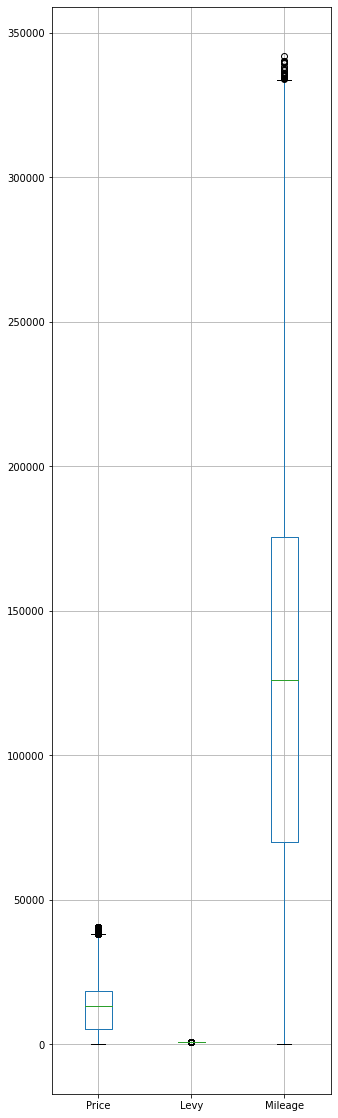

In [773]:

df = pd.DataFrame(cars, columns = ['Price', 'Levy', 'Mileage'])  

plt.figure(figsize = (5, 20)) 
  
df.boxplot()

In [774]:
cars[['Price', 'Levy', 'Mileage']] = cars[['Price', 'Levy', 'Mileage']].apply(replace_outliers_median)

<AxesSubplot:>

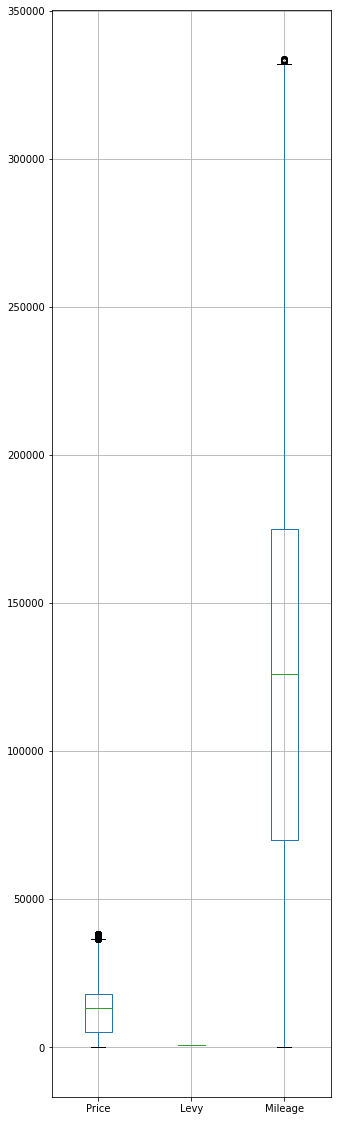

In [775]:

df = pd.DataFrame(cars, columns = ['Price', 'Levy', 'Mileage'])  

plt.figure(figsize = (5, 20)) 
  
df.boxplot()

In [776]:
cars[['Price', 'Mileage']] = cars[['Price',  'Mileage']].apply(replace_outliers_median)

<AxesSubplot:>

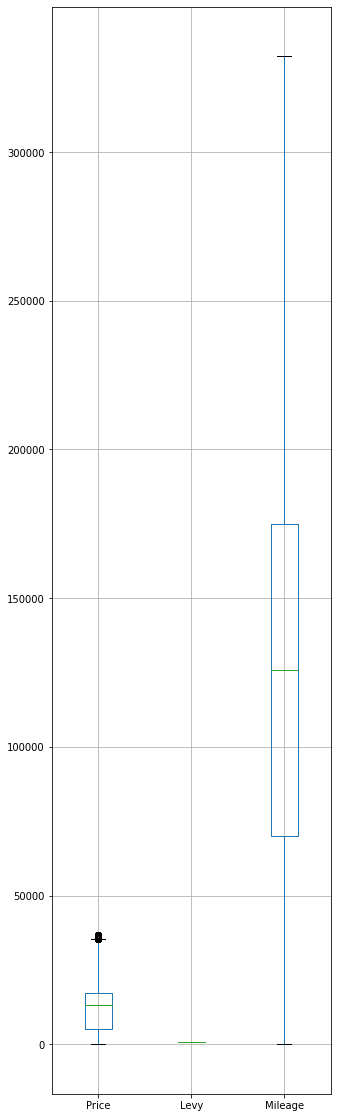

In [777]:

df = pd.DataFrame(cars, columns = ['Price', 'Levy', 'Mileage'])  

plt.figure(figsize = (5, 20)) 
  
df.boxplot()

In [778]:
cars[['Price']] = cars[['Price']].apply(replace_outliers_median)

In [779]:
cars[['Price']] = cars[['Price']].apply(replace_outliers_median)

<AxesSubplot:>

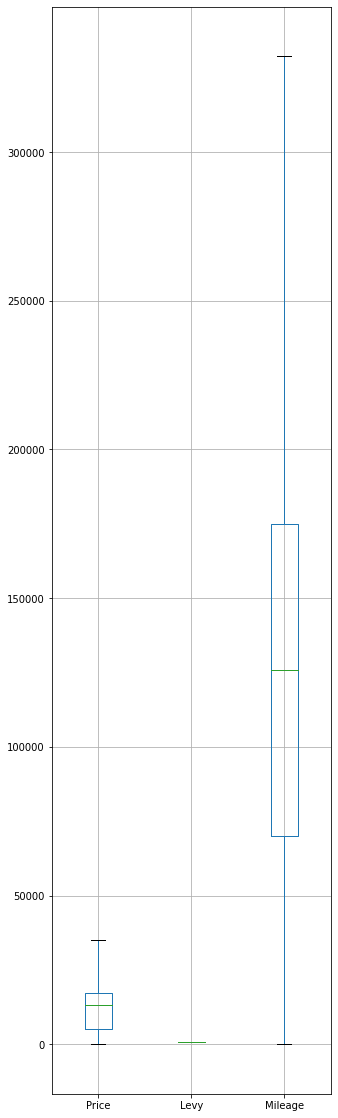

In [780]:

df = pd.DataFrame(cars, columns = ['Price', 'Levy', 'Mileage'])  

plt.figure(figsize = (5, 20)) 
  
df.boxplot()

In [781]:
cars.shape

(19237, 18)

In [782]:
cars.nunique()

Price               1513
Levy                   1
Manufacturer          65
Model               1590
Prod. year            54
Category              11
Leather interior       2
Fuel type              7
Engine volume         65
Mileage             7220
Cylinders             13
Gear box type          4
Drive wheels           3
Doors                  3
Wheel                  2
Color                 16
Airbags               17
Turbo                  2
dtype: int64

In [783]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

In [784]:
cars.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Turbo'],
      dtype='object')

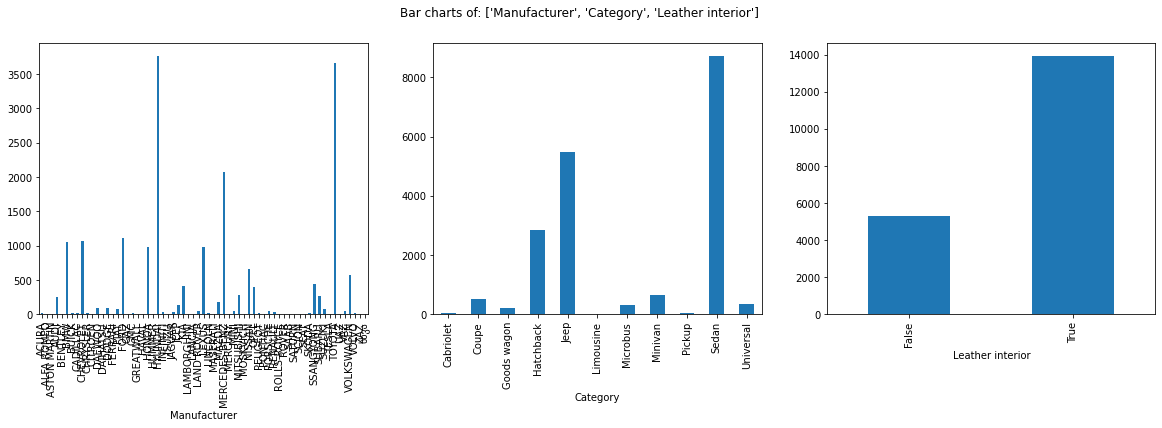

In [785]:
PlotBarCharts(inpData=cars, colsToPlot=['Manufacturer','Category','Leather interior'])

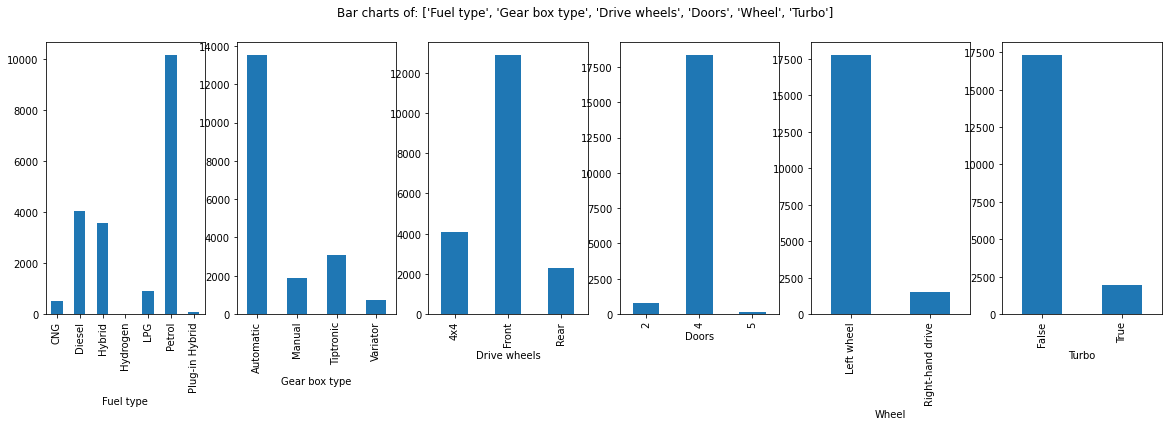

In [786]:
PlotBarCharts(inpData=cars, colsToPlot=['Fuel type',  'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Turbo'])

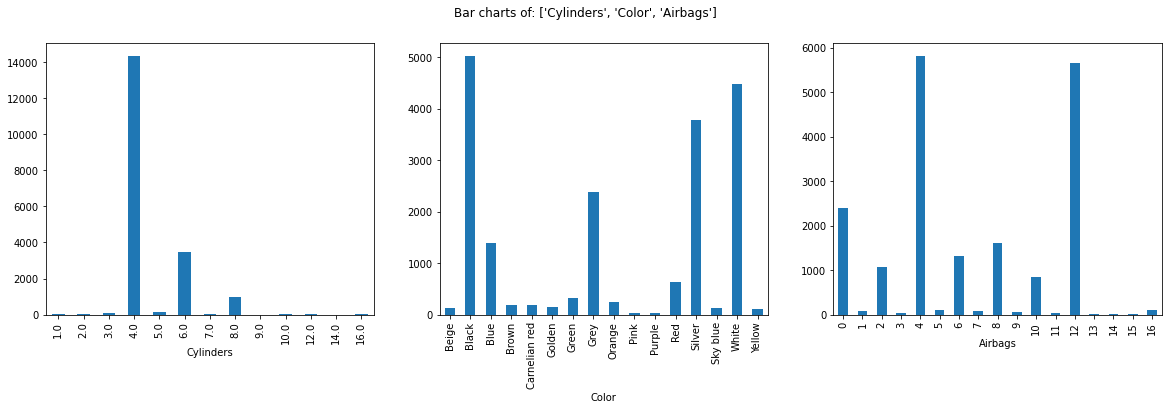

In [787]:
PlotBarCharts(inpData=cars, colsToPlot=['Cylinders', 'Color', 'Airbags'])

In [788]:
deleted_df = cars

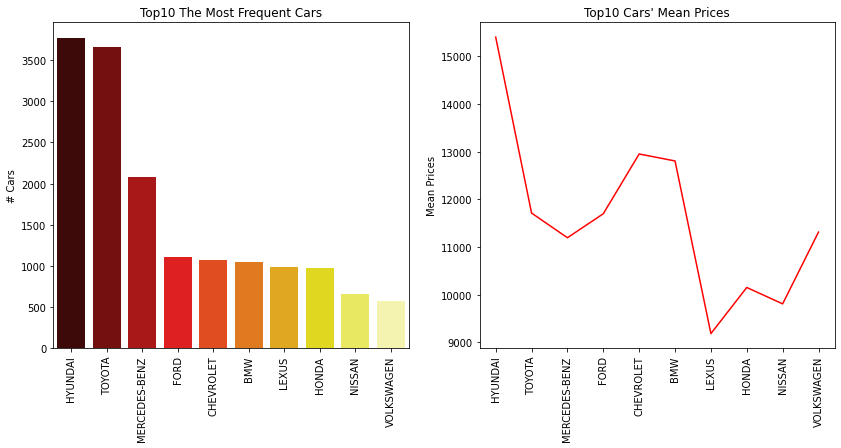

In [789]:
top10_cars = deleted_df['Manufacturer'].value_counts().sort_values(ascending = False)[:10]
top10_mean_prices = [deleted_df[deleted_df['Manufacturer'] == i]['Price'].mean() for i in list(top10_cars.index)]

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
sns.barplot(top10_cars.index, top10_cars.values, palette='hot')
plt.xticks(rotation = 90)
plt.ylabel('# Cars')
plt.title('Top10 The Most Frequent Cars')

ax2 = fig.add_subplot(122)
sns.lineplot(top10_cars.index, top10_mean_prices, color='r')
plt.xticks(rotation = 90)
plt.ylabel('Mean Prices')
plt.title("Top10 Cars' Mean Prices")
plt.show()

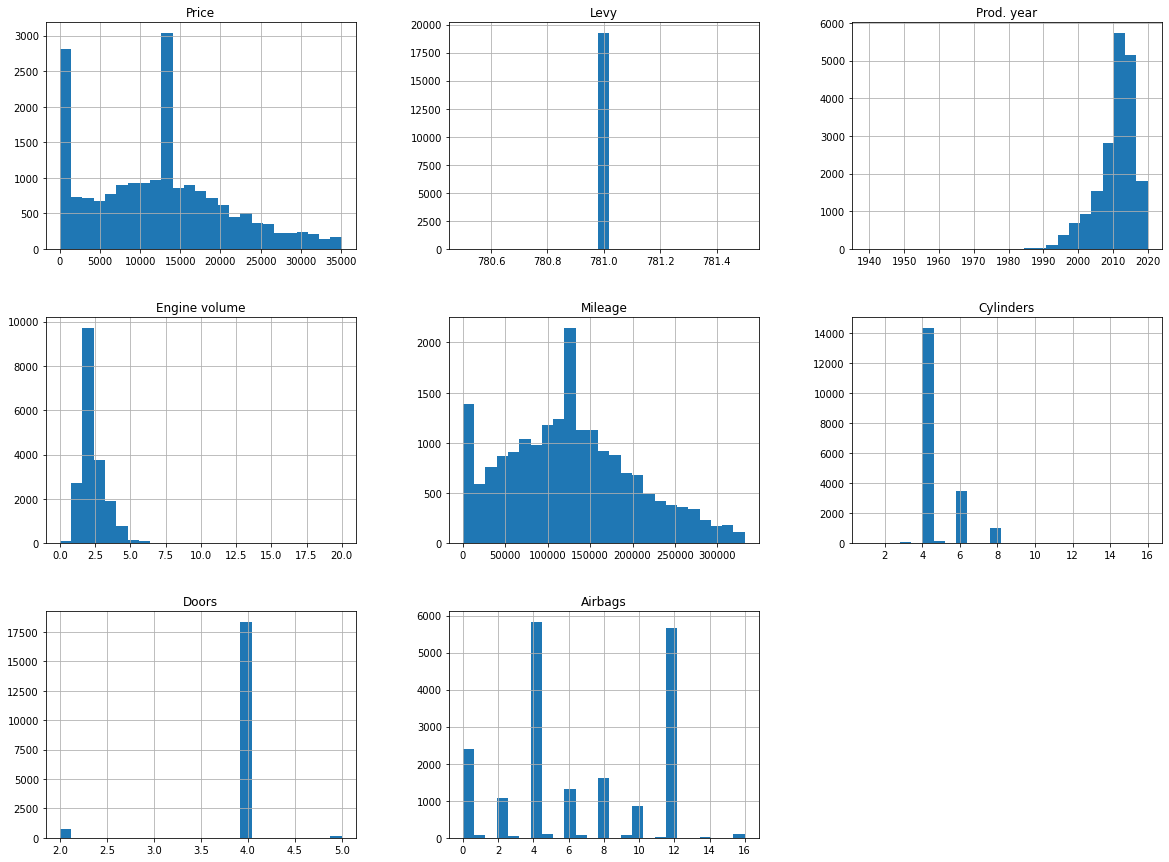

In [790]:
%matplotlib inline

deleted_df.hist(bins=25, figsize=(20,15))
plt.show()

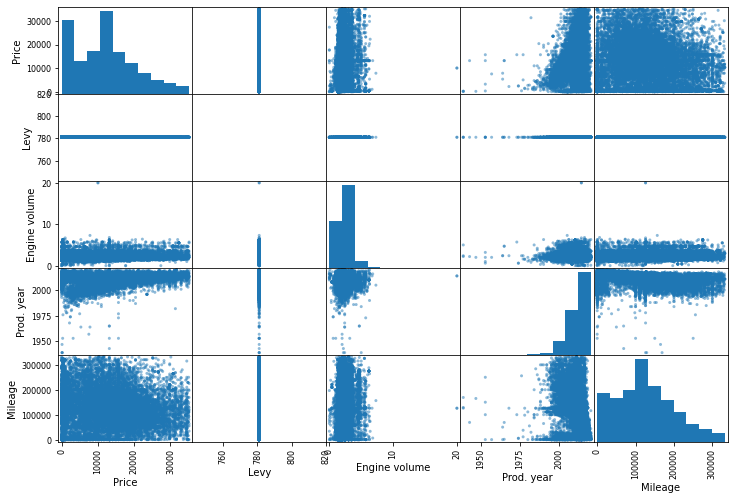

In [791]:
from pandas.plotting import scatter_matrix
attributes = ['Price','Levy','Engine volume','Prod. year','Mileage']
scatter_matrix(deleted_df[attributes], figsize=(12,8))
plt.show()

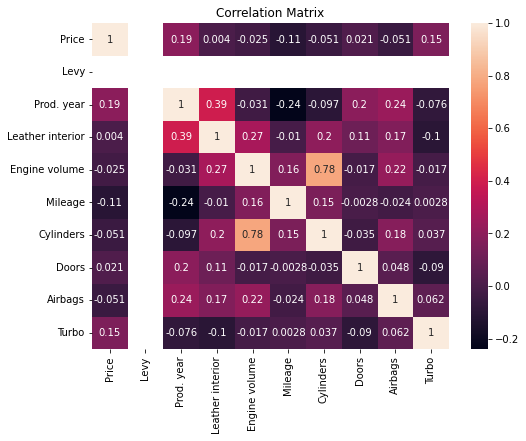

In [792]:
plt.figure(figsize=(8,6))
sns.heatmap(deleted_df.corr(),annot=True, cbar = True)
plt.title('Correlation Matrix')
plt.show()

In [793]:
deleted_df.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Turbo'],
      dtype='object')

In [794]:
df5 = pd.DataFrame(deleted_df, columns= ['Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type','Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Turbo'])

In [795]:
df4 = pd.DataFrame(deleted_df, columns= ['Price','Engine volume','Mileage'])

In [796]:

from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(df4)
res = transformer.transform(df4)

In [797]:
df4 = pd.DataFrame(res, columns =['Price','Engine volume','Mileage'])

In [798]:
df4

,Price,Engine volume,Mileage
0,0.013089,2.142857,0.572234
1,0.289394,1.428571,0.629405
2,-0.394781,-1.000000,0.705696
3,-0.802568,0.714286,0.409742
4,-0.121329,-1.000000,-0.325183
...,...,...,...
19232,-0.394781,0.000000,1.659340
19233,0.210522,0.571429,0.339497
19234,1.085417,0.000000,-0.091884
19235,-0.657912,0.000000,-0.712772


In [799]:
deleted_df = pd.concat([df4.reset_index(drop=True), df5.reset_index(drop=True)], axis=1)

In [800]:
deleted_df

,Price,Engine volume,Mileage,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,0.013089,2.142857,0.572234,781.0,LEXUS,RX 450,2010,Jeep,True,Hybrid,6.0,Automatic,4x4,4,Left wheel,Silver,12,False
1,0.289394,1.428571,0.629405,781.0,CHEVROLET,Equinox,2011,Jeep,False,Petrol,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False
2,-0.394781,-1.000000,0.705696,781.0,HONDA,FIT,2006,Hatchback,False,Petrol,4.0,Variator,Front,4,Right-hand drive,Black,2,False
3,-0.802568,0.714286,0.409742,781.0,FORD,Escape,2011,Jeep,True,Hybrid,4.0,Automatic,4x4,4,Left wheel,White,0,False
4,-0.121329,-1.000000,-0.325183,781.0,HONDA,FIT,2014,Hatchback,True,Petrol,4.0,Automatic,Front,4,Left wheel,Silver,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,-0.394781,0.000000,1.659340,781.0,MERCEDES-BENZ,CLK 200,1999,Coupe,True,CNG,4.0,Manual,Rear,2,Left wheel,Silver,5,True
19233,0.210522,0.571429,0.339497,781.0,HYUNDAI,Sonata,2011,Sedan,True,Petrol,4.0,Tiptronic,Front,4,Left wheel,Red,8,False
19234,1.085417,0.000000,-0.091884,781.0,HYUNDAI,Tucson,2010,Jeep,True,Diesel,4.0,Automatic,Front,4,Left wheel,Grey,4,False
19235,-0.657912,0.000000,-0.712772,781.0,CHEVROLET,Captiva,2007,Jeep,True,Diesel,4.0,Automatic,Front,4,Left wheel,Black,4,False


In [801]:
deleted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  float64
 1   Engine volume     19237 non-null  float64
 2   Mileage           19237 non-null  float64
 3   Levy              19237 non-null  float64
 4   Manufacturer      19237 non-null  object 
 5   Model             19237 non-null  object 
 6   Prod. year        19237 non-null  int64  
 7   Category          19237 non-null  object 
 8   Leather interior  19237 non-null  bool   
 9   Fuel type         19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  int64  
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [802]:
deleted_df.nunique()

Price               1513
Engine volume         65
Mileage             7220
Levy                   1
Manufacturer          65
Model               1590
Prod. year            54
Category              11
Leather interior       2
Fuel type              7
Cylinders             13
Gear box type          4
Drive wheels           3
Doors                  3
Wheel                  2
Color                 16
Airbags               17
Turbo                  2
dtype: int64

In [803]:
deleted_df.columns

Index(['Price', 'Engine volume', 'Mileage', 'Levy', 'Manufacturer', 'Model',
       'Prod. year', 'Category', 'Leather interior', 'Fuel type', 'Cylinders',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color', 'Airbags',
       'Turbo'],
      dtype='object')

In [804]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [805]:
# Calling the function to check which categorical variables are correlated with target
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Manufacturer', 'Model',
       'Prod. year', 'Category', 'Leather interior', 'Fuel type', 'Cylinders',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color', 'Airbags',
       'Turbo']
FunctionAnova(inpData=deleted_df, 
              TargetVariable='Price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Manufacturer is correlated with Price | P-Value: 1.6777611671671883e-302
Model is correlated with Price | P-Value: 0.0
Prod. year is correlated with Price | P-Value: 3.1377854663239692e-177
Category is correlated with Price | P-Value: 5.462030494877262e-76
Leather interior is NOT correlated with Price | P-Value: 0.5802120087547344
Fuel type is correlated with Price | P-Value: 5.108398856115434e-210
Cylinders is correlated with Price | P-Value: 9.2281083393445e-30
Gear box type is correlated with Price | P-Value: 8.996859869355648e-226
Drive wheels is correlated with Price | P-Value: 5.767643686883744e-29
Doors is correlated with Price | P-Value: 0.0005660868403114363
Wheel is correlated with Price | P-Value: 6.0995208479578984e-61
Color is correlated with Price | P-Value: 4.675362095718551e-34
Airbags is correlated with Price | P-Value: 0.0
Turbo is correlated with Price | P-Value: 3.755229102490685e-102


['Manufacturer',
 'Model',
 'Prod. year',
 'Category',
 'Fuel type',
 'Cylinders',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color',
 'Airbags',
 'Turbo']

In [806]:
deleted_df = deleted_df.drop(columns=['Levy'])
deleted_df = deleted_df.drop(columns=['Leather interior'])


In [807]:
from sklearn.preprocessing import LabelEncoder
# create a label encoder object
le = LabelEncoder()

# apply label encoding to each categorical variable
deleted_df['Gear box type'] = le.fit_transform(deleted_df['Gear box type'])
deleted_df['Fuel type'] = le.fit_transform(deleted_df['Fuel type'])
deleted_df['Wheel'] = le.fit_transform(deleted_df['Wheel'])
deleted_df['Color'] = le.fit_transform(deleted_df['Color'])
deleted_df['Drive wheels'] = le.fit_transform(deleted_df['Drive wheels'])
deleted_df['Category'] = le.fit_transform(deleted_df['Category'])
deleted_df['Manufacturer'] = le.fit_transform(deleted_df['Manufacturer'])
deleted_df['Model'] = le.fit_transform(deleted_df['Model'])

# print the encoded data frame
deleted_df

,Price,Engine volume,Mileage,Manufacturer,Model,Prod. year,Category,Fuel type,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,0.013089,2.142857,0.572234,32,1242,2010,4,2,6.0,0,0,4,0,12,12,False
1,0.289394,1.428571,0.629405,8,658,2011,4,5,6.0,2,0,4,0,1,8,False
2,-0.394781,-1.000000,0.705696,21,684,2006,3,5,4.0,3,1,4,1,1,2,False
3,-0.802568,0.714286,0.409742,16,661,2011,4,2,4.0,0,0,4,0,14,0,False
4,-0.121329,-1.000000,-0.325183,21,684,2014,3,5,4.0,0,1,4,0,12,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,-0.394781,0.000000,1.659340,36,385,1999,1,0,4.0,1,2,2,0,12,5,True
19233,0.210522,0.571429,0.339497,23,1334,2011,9,5,4.0,2,1,4,0,11,8,False
19234,1.085417,0.000000,-0.091884,23,1442,2010,4,1,4.0,0,1,4,0,7,4,False
19235,-0.657912,0.000000,-0.712772,8,456,2007,4,1,4.0,0,1,4,0,1,4,False


In [808]:
deleted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          19237 non-null  float64
 1   Engine volume  19237 non-null  float64
 2   Mileage        19237 non-null  float64
 3   Manufacturer   19237 non-null  int64  
 4   Model          19237 non-null  int64  
 5   Prod. year     19237 non-null  int64  
 6   Category       19237 non-null  int64  
 7   Fuel type      19237 non-null  int64  
 8   Cylinders      19237 non-null  float64
 9   Gear box type  19237 non-null  int64  
 10  Drive wheels   19237 non-null  int64  
 11  Doors          19237 non-null  int64  
 12  Wheel          19237 non-null  int64  
 13  Color          19237 non-null  int64  
 14  Airbags        19237 non-null  int64  
 15  Turbo          19237 non-null  bool   
dtypes: bool(1), float64(4), int64(11)
memory usage: 2.2 MB


In [809]:
deleted_df = deleted_df.reset_index()

In [810]:
deleted_df.head()

,index,Price,Engine volume,Mileage,Manufacturer,Model,Prod. year,Category,Fuel type,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,0,0.013089,2.142857,0.572234,32,1242,2010,4,2,6.0,0,0,4,0,12,12,False
1,1,0.289394,1.428571,0.629405,8,658,2011,4,5,6.0,2,0,4,0,1,8,False
2,2,-0.394781,-1.000000,0.705696,21,684,2006,3,5,4.0,3,1,4,1,1,2,False
3,3,-0.802568,0.714286,0.409742,16,661,2011,4,2,4.0,0,0,4,0,14,0,False
4,4,-0.121329,-1.000000,-0.325183,21,684,2014,3,5,4.0,0,1,4,0,12,4,False


In [811]:
df2 = deleted_df.drop(columns=['index'])

In [812]:
df3 = df2.sample(frac = 1)

In [813]:
X = np.array(df3.drop(["Price"],1))
print("Shape of X:",X.shape)
print(X)

Shape of X: (19237, 15)
[[0.7142857142857143 -1.0585441679938203 5 ... 2 2 False]
 [0.0 -0.6376441193580072 8 ... 12 4 False]
 [0.0 1.39231935609998 16 ... 7 4 False]
 ...
 [2.142857142857143 -0.7724511496171121 41 ... 14 12 False]
 [-0.28571428571428564 -0.4003299606145278 58 ... 4 8 False]
 [0.4285714285714283 0.5746082909756726 16 ... 13 4 False]]


In [814]:
y = np.array(df3["Price"])
print("Shape of y:",y.shape)
print(y)

Shape of y: (19237,)
[ 0.15782849 -0.7631314   0.23728814 ...  1.78931029  0.86835039
  0.36314818]


In [815]:
size = X.shape[0]
X_train = X[:int(0.7 * size),:]
X_test = X[int(0.7 * size):,:]
y_train = y[:int(0.7 * size)]
y_test = y[int(0.7 * size):]

In [816]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(13465, 15)
(5772, 15)
(13465,)
(5772,)


In [817]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)
y_pred = np.zeros(y_test.shape)
y_train.shape, y_test.shape,y_pred.shape

((13465, 1), (5772, 1), (5772, 1))

In [818]:
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)


In [819]:
print(RegModel)

KNeighborsRegressor(n_neighbors=3)


In [820]:
from sklearn.model_selection import GridSearchCV
param={'n_neighbors': range(1,50)}
grid_kn=GridSearchCV(estimator=RegModel,param_grid=param,scoring='neg_mean_squared_error',cv=5,verbose=1,n_jobs=-1)
grid_kn.fit(X_train,y_train)
print('Best K For Model is: ',grid_kn.best_params_)
print('Best Score is: ',grid_kn.best_score_)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
Best K For Model is:  {'n_neighbors': 4}
Best Score is:  -0.29035575246524703


In [821]:
RegModel = KNeighborsRegressor(n_neighbors=4)

In [822]:
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

In [823]:
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

R2 Value: 0.6856796176279565
